In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import scale as mscale
from matplotlib import transforms as mtransforms
from matplotlib.ticker import Formatter, FixedLocator
from matplotlib import rcParams
from matplotlib import gridspec

from ZOEE import update_plotstyle
from ZOEE import LatitudeScale
import matplotlib
update_plotstyle()
mscale.register_scale(LatitudeScale)
import seaborn as sns
#matplotlib.rcParams['xtick.minor.size']=0

In [4]:
ZMT_HadCM3=np.genfromtxt('../Data/Old_Optimizations/HadCM3_ZMT_20_resp_2.txt', delimiter=',',unpack=True)
ZMT_CESM=np.genfromtxt('../Data/Old_Optimizations/CESM_ZMT_20_resp_2.txt', delimiter=',',unpack=True)
ZMT_Pages=np.genfromtxt('../Data/Old_Optimizations/Pages_ZMT_20_resp_2.txt', delimiter=',',unpack=True)

In [5]:
Lat_10,ZMT_ERA=np.loadtxt('Experiments/ERA5/ERA_1961_1990_10deg_ZMTanomaly.txt',delimiter=',')

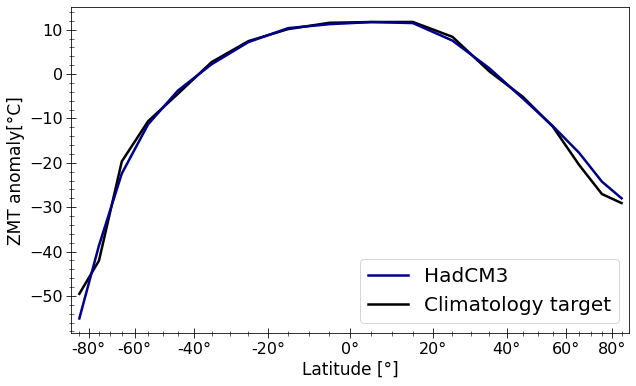

In [6]:
plt.figure(figsize=(10,6))
plt.plot(np.deg2rad(Lat_10),ZMT_HadCM3[:,0],color='darkblue',label='HadCM3',zorder=5)
#plt.plot(np.deg2rad(Lat_10),ZMT_CESM[:,0],color='darkgreen',label='CESM',zorder=5)
#plt.plot(np.deg2rad(Lat_10),ZMT_Pages[:,0],color='darkorange',label='Pages',zorder=5)
plt.plot(np.deg2rad(Lat_10),ZMT_ERA,'k',label='Climatology target',zorder=-1)
plt.xscale('latarea')
plt.xlabel('Latitude [°]',fontsize=17)
plt.ylabel('ZMT anomaly[°C]',fontsize=17)
#plt.ylim(-36,28)
plt.legend(fontsize=20)
#plt.savefig('../Latex/Figures/Clima_opti.png',format='PNG',dpi=400,bbox_inches='tight',transparency=True)

In [7]:
GMT_HadCM3=np.genfromtxt('../Data/Old_Optimizations/HadCM3_GMT_20_resp_2.txt', delimiter=',',unpack=True)
GMT_CESM=np.genfromtxt('../Data/Old_Optimizations/CESM_GMT_20_resp_2.txt', delimiter=',',unpack=True)
GMT_Pages=np.genfromtxt('../Data/Old_Optimizations/Pages_GMT_20_resp_2.txt', delimiter=',',unpack=True)

In [8]:
Time_HadCM3,Target_HadCM3=np.loadtxt('Experiments/HadCM3/HadCM3_850_1850_anomaly.txt',delimiter=',')
Time_HadCM3,Target_HadCM3_kel=np.loadtxt('Experiments/HadCM3/HadCM3_850_1850.txt',delimiter=',')
Time_CESM,Target_CESM=np.loadtxt('Experiments/CESM/CESM_850_1850_response.txt',delimiter=',')
Time_Pages,Target_Pages=np.loadtxt('Experiments/Pages2k/Pages2k_850_1850.txt',delimiter=',')

OSError: Experiments/HadCM3/HadCM3_850_1850_anomaly.txt not found.

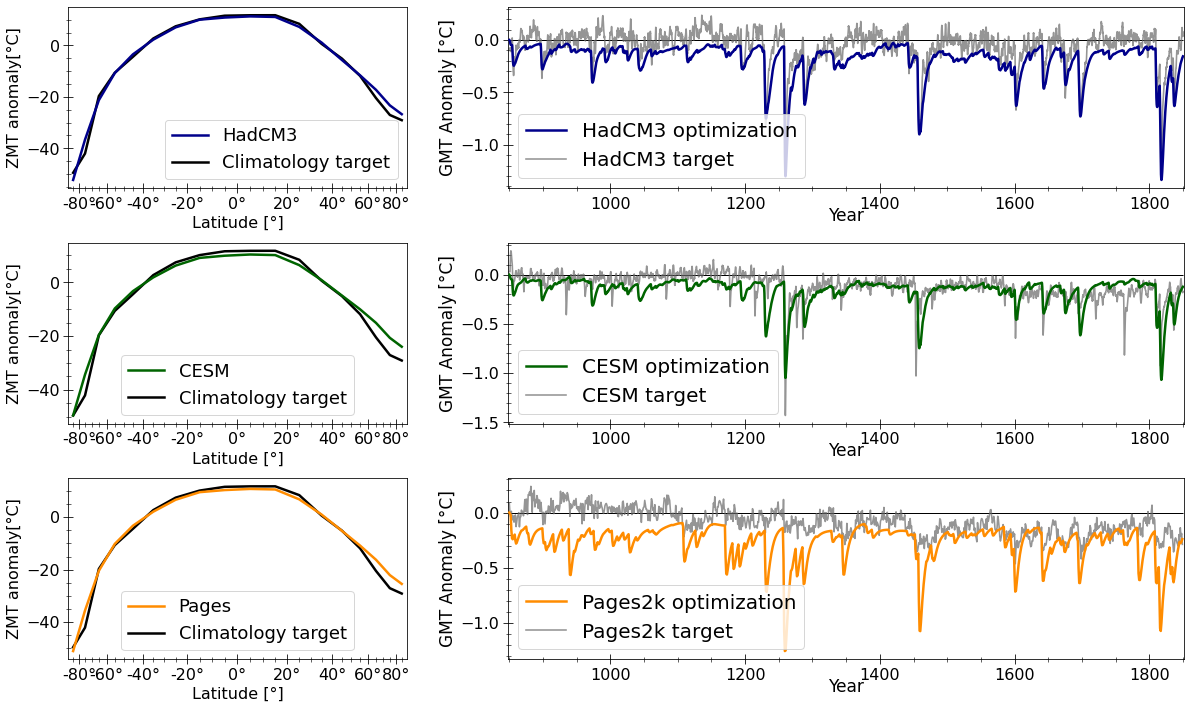

In [10]:
fig=plt.figure(figsize=(20,12))
gs = gridspec.GridSpec(3, 2, width_ratios=[1, 2]) 
ax=np.array([[plt.subplot(gs[0,0]),plt.subplot(gs[0,1])],
             [plt.subplot(gs[1,0]),plt.subplot(gs[1,1])],
             [plt.subplot(gs[2,0]),plt.subplot(gs[2,1])]])

ax[0,0].plot(np.deg2rad(Lat_10),ZMT_HadCM3[:,-1],color='darkblue',label='HadCM3',zorder=5)
ax[0,0].plot(np.deg2rad(Lat_10),ZMT_ERA,'k',label='Climatology target',zorder=-1)
ax[0,0].set_xscale('latarea')
ax[0,0].set_xlabel('Latitude [°]',fontsize=16)
ax[0,0].set_ylabel('ZMT anomaly[°C]',fontsize=16)
ax[0,0].legend(fontsize=18)

ax[1,0].plot(np.deg2rad(Lat_10),ZMT_CESM[:,-1],color='darkgreen',label='CESM',zorder=5)
ax[1,0].plot(np.deg2rad(Lat_10),ZMT_ERA,'k',label='Climatology target',zorder=-1)
ax[1,0].set_xscale('latarea')
ax[1,0].set_xlabel('Latitude [°]',fontsize=16)
ax[1,0].set_ylabel('ZMT anomaly[°C]',fontsize=16)
ax[1,0].legend(fontsize=18)

ax[2,0].plot(np.deg2rad(Lat_10),ZMT_Pages[:,-1],color='darkorange',label='Pages',zorder=5)
ax[2,0].plot(np.deg2rad(Lat_10),ZMT_ERA,'k',label='Climatology target',zorder=-1)
ax[2,0].set_xscale('latarea')
ax[2,0].set_xlabel('Latitude [°]',fontsize=16)
ax[2,0].set_ylabel('ZMT anomaly[°C]',fontsize=16)
ax[2,0].legend(fontsize=18)

ax[0,1].plot(Time_HadCM3,GMT_HadCM3[:,-1],linewidth=2.5,alpha=1,color='darkblue',label='HadCM3 optimization',zorder=5)
ax[0,1].plot(Time_HadCM3,Target_HadCM3,color='dimgray',linewidth=1.6,alpha=.7, label='HadCM3 target')
ax[0,1].set_xlim(848,1852)
ax[0,1].set_ylabel('GMT Anomaly [°C]',fontsize=17)
ax[0,1].set_xlabel('Year',fontsize=17,labelpad=-5)
ax[0,1].legend(fontsize=20)
ax[0,1].hlines(0,850,1850,linewidth=1)

ax[1,1].plot(Time_CESM,GMT_CESM[:,-1],linewidth=2.5,alpha=1,color='darkgreen',label='CESM optimization',zorder=5)
ax[1,1].plot(Time_CESM,Target_CESM,color='dimgray',linewidth=1.6,alpha=.7, label='CESM target')
ax[1,1].set_xlim(848,1852)
ax[1,1].set_ylabel('GMT Anomaly [°C]',fontsize=17)
ax[1,1].set_xlabel('Year',fontsize=17,labelpad=-5)
ax[1,1].legend(fontsize=20)
ax[1,1].hlines(0,850,1850,linewidth=1)

ax[2,1].plot(Time_Pages,GMT_Pages[:,-1],linewidth=2.5,alpha=1,color='darkorange',label='Pages2k optimization',zorder=5)
ax[2,1].plot(Time_Pages,Target_Pages,color='dimgray',linewidth=1.6,alpha=.7, label='Pages2k target')
ax[2,1].set_xlim(848,1852)
ax[2,1].set_ylabel('GMT Anomaly [°C]',fontsize=17)
ax[2,1].set_xlabel('Year',fontsize=17,labelpad=-5)
ax[2,1].legend(fontsize=20)
ax[2,1].hlines(0,850,1850,linewidth=1)

plt.subplots_adjust(hspace=0.3)

In [6]:
P_HadCM3=np.genfromtxt('Experiments/Output/HadCM3_P_20_resp_2.txt', delimiter=',',unpack=True)
P_CESM=np.genfromtxt('Experiments/Output/CESM_P_20_resp_2.txt', delimiter=',',unpack=True)
P_Pages=np.genfromtxt('Experiments/Output/Pages_P_20_resp_2.txt', delimiter=',',unpack=True)

In [53]:
print(P_HadCM3[:,0])
print(P_CESM[:,0])
print(P_Pages[:,0])

[3.36080213e+08 1.99110459e+02 2.50000000e+00 1.16280165e+00
 1.16479832e+00 1.15393088e+00]
[4.20000000e+08 1.79186652e+02 2.50000000e+00 1.14520573e+00
 1.15983625e+00 1.06833995e+00]
[3.83114417e+08 1.92304028e+02 2.50000000e+00 1.15933219e+00
 1.16361739e+00 1.13967602e+00]


# Parameter Experiments

In [8]:
from ZOEE.modules.optimization import optimization

In [9]:
Pref=[70,200,1.9,1.165,1.165,1.165]
Pmin=np.array([1*4.2e6,170,1.3,0.9,0.9,0.9])
Pmax=np.array([200*4.2e6,240,2.5,1.3,1.3,1.3])
parameter_labels=[['eqparam','c_ao'],['func3','a'],['func3','b'],['func4','factor_oc'],['func4','factor_kwv'],['func4','factor_kair']]
parameter_levels=np.array([None,None,None,None,None,None])
num_params = 1
num_parallels = 100

Parameters=[]
for i in range(6):
    Parameters.append({'name':parameter_labels[i],
                       'level':parameter_levels[i],
                       'range': np.linspace(Pmin[i],Pmax[i],50),
                       'reference':Pref[i]})

In [10]:
Ptest_HadCM3_paras=[]
Ptest_HadCM3_ZMT=[]
Ptest_HadCM3_GMT=[]
for i in range(6):
    data=np.genfromtxt('../Data/parametertest/Parametertest_HadCM3_'+str(i)+'.txt',delimiter=',')
    Ptest_HadCM3_paras.append(data[0])
    Ptest_HadCM3_ZMT.append(data[1:19])
    Ptest_HadCM3_GMT.append(data[20:])

In [11]:
Ptest_CESM_paras=[]
Ptest_CESM_ZMT=[]
Ptest_CESM_GMT=[]
for i in range(6):
    data=np.genfromtxt('../Data/parametertest/Parametertest_CESM_'+str(i)+'.txt',delimiter=',')
    Ptest_CESM_paras.append(data[0])
    Ptest_CESM_ZMT.append(data[1:19])
    Ptest_CESM_GMT.append(data[20:])

In [12]:
Ptest_Pages_paras=[]
Ptest_Pages_ZMT=[]
Ptest_Pages_GMT=[]
for i in range(6):
    data=np.genfromtxt('../Data/parametertest/Parametertest_Pages_'+str(i)+'.txt',delimiter=',')
    Ptest_Pages_paras.append(data[0])
    Ptest_Pages_ZMT.append(data[1:19])
    Ptest_Pages_GMT.append(data[20:])

In [17]:
#Ptest_HadCM3_GMT_0=[]
#Ptest_CESM_GMT_0=[]
#Ptest_Pages_GMT_0=[]
#for i in range(6):
    #Ptest_HadCM3_GMT_0.append(np.average(Ptest_HadCM3_ZMT[i],weights=np.cos(Lat_10*np.pi/180),axis=0))
    #Ptest_CESM_GMT_0.append(np.average(Ptest_CESM_ZMT[i],weights=np.cos(Lat_10*np.pi/180),axis=0))
    #Ptest_Pages_GMT_0.append(np.average(Ptest_Pages_ZMT[i],weights=np.cos(Lat_10*np.pi/180),axis=0))
    
mean_years=30
Ptest_HadCM3_GMT_0=np.mean(np.array(Ptest_HadCM3_GMT)[:,:int(12*mean_years)],axis=1)
Ptest_CESM_GMT_0=np.mean(np.array(Ptest_CESM_GMT)[:,:int(12*mean_years)],axis=1)
Ptest_Pages_GMT_0=np.mean(np.array(Ptest_Pages_GMT)[:,:int(mean_years)],axis=1)
Ptest_HadCM3_GMT_anomaly=[]
Ptest_CESM_GMT_anomaly=[]
Ptest_Pages_GMT_anomaly=[]
for i in range(6):
    Ptest_HadCM3_GMT_anomaly.append(Ptest_HadCM3_GMT[i]-Ptest_HadCM3_GMT_0[i])
    Ptest_CESM_GMT_anomaly.append(Ptest_CESM_GMT[i]-Ptest_CESM_GMT_0[i])
    Ptest_Pages_GMT_anomaly.append(Ptest_Pages_GMT[i]-Ptest_Pages_GMT_0[i])
Ptest_HadCM3_GMT_anomaly=np.array(Ptest_HadCM3_GMT_anomaly)
Ptest_CESM_GMT_anomaly=np.array(Ptest_CESM_GMT_anomaly)
Ptest_Pages_GMT_anomaly=np.array(Ptest_Pages_GMT_anomaly)

Ptest_HadCM3_ZMT_anomaly=[]
Ptest_CESM_ZMT_anomaly=[]
Ptest_Pages_ZMT_anomaly=[]
for i in range(6):
    Ptest_HadCM3_ZMT_anomaly.append(
        Ptest_HadCM3_ZMT[i]-np.average(Ptest_HadCM3_ZMT[i],weights=np.cos(Lat_10*np.pi/180),axis=0))
    Ptest_CESM_ZMT_anomaly.append(
        Ptest_CESM_ZMT[i]-np.average(Ptest_CESM_ZMT[i],weights=np.cos(Lat_10*np.pi/180),axis=0))
    Ptest_Pages_ZMT_anomaly.append(
        Ptest_Pages_ZMT[i]-np.average(Ptest_Pages_ZMT[i],weights=np.cos(Lat_10*np.pi/180),axis=0))

In [18]:
Ptest_HadCM3_paras[0]=Ptest_HadCM3_paras[0]/4.2e6
Ptest_CESM_paras[0]=Ptest_CESM_paras[0]/4.2e6
Ptest_Pages_paras[0]=Ptest_Pages_paras[0]/4.2e6

In [19]:
Lat_10,ZMT_ERA_raw=np.loadtxt('Experiments/ERA5/ERA_1961_1990_10deg_ZMT.txt')
Lat_10,ZMT_ERA_anomaly=np.loadtxt('Experiments/ERA5/ERA_1961_1990_10deg_ZMTanomaly.txt',delimiter=',')
opt_ZMT=optimization(grid=Lat_10)
opt_ZMT.parallels=100
#Ptest_CESM_ZMT[0].shape
S_ZMT_HadCM3=[]
S_ZMT_CESM=[]
S_ZMT_Pages=[]
S_ZMT_HadCM3_anomaly=[]
S_ZMT_CESM_anomaly=[]
S_ZMT_Pages_anomaly=[]
for i in range(6):
    S_ZMT_HadCM3.append(opt_ZMT.target_comparison(np.transpose(Ptest_HadCM3_ZMT[i]), 'ZMT', ZMT_ERA_raw))
    S_ZMT_CESM.append(opt_ZMT.target_comparison(np.transpose(Ptest_CESM_ZMT[i]), 'ZMT', ZMT_ERA_raw))
    S_ZMT_Pages.append(opt_ZMT.target_comparison(np.transpose(Ptest_Pages_ZMT[i]), 'ZMT', ZMT_ERA_raw))
    S_ZMT_HadCM3_anomaly.append(opt_ZMT.target_comparison(np.transpose(Ptest_HadCM3_ZMT_anomaly[i]), 'ZMT', ZMT_ERA_anomaly))
    S_ZMT_CESM_anomaly.append(opt_ZMT.target_comparison(np.transpose(Ptest_CESM_ZMT_anomaly[i]), 'ZMT', ZMT_ERA_anomaly))
    S_ZMT_Pages_anomaly.append(opt_ZMT.target_comparison(np.transpose(Ptest_Pages_ZMT_anomaly[i]), 'ZMT', ZMT_ERA_anomaly))
S_GMT_HadCM3=[]
S_GMT_CESM=[]
S_GMT_Pages=[]

for i in range(6):
    S_GMT_HadCM3.append(opt_ZMT.target_comparison(
        np.transpose(Ptest_HadCM3_GMT_anomaly[i]), 'GMT', Target_HadCM3))
    S_GMT_CESM.append(opt_ZMT.target_comparison(
        np.transpose(Ptest_CESM_GMT_anomaly[i]), 'GMT', Target_CESM))
    S_GMT_Pages.append(opt_ZMT.target_comparison(
        np.transpose(Ptest_Pages_GMT_anomaly[i]), 'GMT', Target_Pages))

for i in range(6):
    for j in range(100):
        if all(np.isnan(Ptest_HadCM3_ZMT[i][:,j])):
            S_ZMT_HadCM3[i][j]=np.nan
        if all(np.isnan(Ptest_HadCM3_GMT[i][:,j])):
            S_GMT_HadCM3[i][j]=np.nan
        if all(np.isnan(Ptest_CESM_ZMT[i][:,j])):
            S_ZMT_CESM[i][j]=np.nan
        if all(np.isnan(Ptest_CESM_GMT[i][:,j])):
            S_GMT_CESM[i][j]=np.nan
        if all(np.isnan(Ptest_Pages_ZMT[i][:,j])):
            S_ZMT_Pages[i][j]=np.nan
        if all(np.isnan(Ptest_Pages_GMT[i][:,j])):
            S_GMT_Pages[i][j]=np.nan
            

In [20]:
S_sum_mean_HadCM3=[]
S_sum_selfweight_HadCM3=[]
S_grad_mean_HadCM3=[]
S_grad_selfweight_HadCM3=[]
for ind in range(6):
    S_sum_mean_HadCM3.append((S_GMT_HadCM3[ind]+S_ZMT_HadCM3[ind])/2)
    S_sum_selfweight_HadCM3.append((2*S_ZMT_HadCM3[ind]*S_GMT_HadCM3[ind])/(S_GMT_HadCM3[ind]+S_ZMT_HadCM3[ind]))
    S_grad_mean_HadCM3.append(np.gradient(S_sum_mean_HadCM3[ind]))
    S_grad_selfweight_HadCM3.append(np.gradient(S_sum_selfweight_HadCM3[ind]))
    
S_sum_mean_CESM=[]
S_sum_selfweight_CESM=[]
S_grad_mean_CESM=[]
S_grad_selfweight_CESM=[]
for ind in range(6):
    S_sum_mean_CESM.append((S_GMT_CESM[ind]+S_ZMT_CESM[ind])/2)
    S_sum_selfweight_CESM.append((2*S_ZMT_CESM[ind]*S_GMT_CESM[ind])/(S_GMT_CESM[ind]+S_ZMT_CESM[ind]))
    S_grad_mean_CESM.append(np.gradient(S_sum_mean_CESM[ind]))
    S_grad_selfweight_CESM.append(np.gradient(S_sum_selfweight_CESM[ind]))

S_sum_mean_Pages=[]
S_sum_selfweight_Pages=[]
S_grad_mean_Pages=[]
S_grad_selfweight_Pages=[]
for ind in range(6):
    S_sum_mean_Pages.append((S_GMT_Pages[ind]+S_ZMT_Pages[ind])/2)
    S_sum_selfweight_Pages.append((2*S_ZMT_Pages[ind]*S_GMT_Pages[ind])/(S_GMT_Pages[ind]+S_ZMT_Pages[ind]))
    S_grad_mean_Pages.append(np.gradient(S_sum_mean_Pages[ind]))
    S_grad_selfweight_Pages.append(np.gradient(S_sum_selfweight_Pages[ind]))

In [21]:
S_sum_mean_HadCM3_anomaly=[]
S_sum_selfweight_HadCM3_anomaly=[]
S_grad_mean_HadCM3_anomaly=[]
S_grad_selfweight_HadCM3_anomaly=[]
for ind in range(6):
    S_sum_mean_HadCM3_anomaly.append((S_GMT_HadCM3[ind]+S_ZMT_HadCM3_anomaly[ind])/2)
    S_sum_selfweight_HadCM3_anomaly.append((2*S_ZMT_HadCM3_anomaly[ind]*S_GMT_HadCM3[ind])/(S_GMT_HadCM3[ind]+S_ZMT_HadCM3_anomaly[ind]))
    S_grad_mean_HadCM3_anomaly.append(np.gradient(S_sum_mean_HadCM3_anomaly[ind]))
    S_grad_selfweight_HadCM3_anomaly.append(np.gradient(S_sum_selfweight_HadCM3_anomaly[ind]))
    
S_sum_mean_CESM_anomaly=[]
S_sum_selfweight_CESM_anomaly=[]
S_grad_mean_CESM_anomaly=[]
S_grad_selfweight_CESM_anomaly=[]
for ind in range(6):
    S_sum_mean_CESM_anomaly.append((S_GMT_CESM[ind]+S_ZMT_CESM_anomaly[ind])/2)
    S_sum_selfweight_CESM_anomaly.append((2*S_ZMT_CESM_anomaly[ind]*S_GMT_CESM[ind])/(S_GMT_CESM[ind]+S_ZMT_CESM_anomaly[ind]))
    S_grad_mean_CESM_anomaly.append(np.gradient(S_sum_mean_CESM_anomaly[ind]))
    S_grad_selfweight_CESM_anomaly.append(np.gradient(S_sum_selfweight_CESM_anomaly[ind]))

S_sum_mean_Pages_anomaly=[]
S_sum_selfweight_Pages_anomaly=[]
S_grad_mean_Pages_anomaly=[]
S_grad_selfweight_Pages_anomaly=[]
for ind in range(6):
    S_sum_mean_Pages_anomaly.append((S_GMT_Pages[ind]+S_ZMT_Pages_anomaly[ind])/2)
    S_sum_selfweight_Pages_anomaly.append((2*S_ZMT_Pages_anomaly[ind]*S_GMT_Pages[ind])/(S_GMT_Pages[ind]+S_ZMT_Pages_anomaly[ind]))
    S_grad_mean_Pages_anomaly.append(np.gradient(S_sum_mean_Pages_anomaly[ind]))
    S_grad_selfweight_Pages_anomaly.append(np.gradient(S_sum_selfweight_Pages_anomaly[ind]))

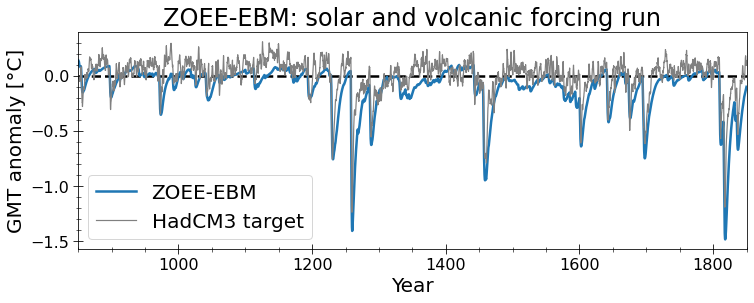

In [68]:
fig=plt.figure(figsize=(12,4))
plt.axhline(0,0,1,c='k',linestyle='--')
plt.plot(Time_HadCM3,Ptest_HadCM3_GMT_anomaly[2,:,60],label='ZOEE-EBM')
plt.plot(Time_HadCM3,Target_HadCM3,label='HadCM3 target',linewidth=1.2,c='grey')
plt.xlabel('Year')
plt.ylabel('GMT anomaly [°C]')
plt.title('ZOEE-EBM: solar and volcanic forcing run')
plt.xlim(849,1851)
plt.legend(fontsize=20)
#plt.plot((Ptest_HadCM3_GMT[2]-Ptest_HadCM3_GMT[2][0])[:,60])

#plt.plot(Ptest_HadCM3_GMT[0][:,25])
#plt.plot(Target_Pages)
#print(Ptest_HadCM3_paras[0][20],Ptest_HadCM3_paras[0][25])
plt.savefig('../Latex/Figures/Forcing_run_target.png',dpi=400,transparent=True,bbox_inches='tight')

Text(0.5, 0.98, 'Parameter tests - ZMT anomaly/GMT anomaly cost function')

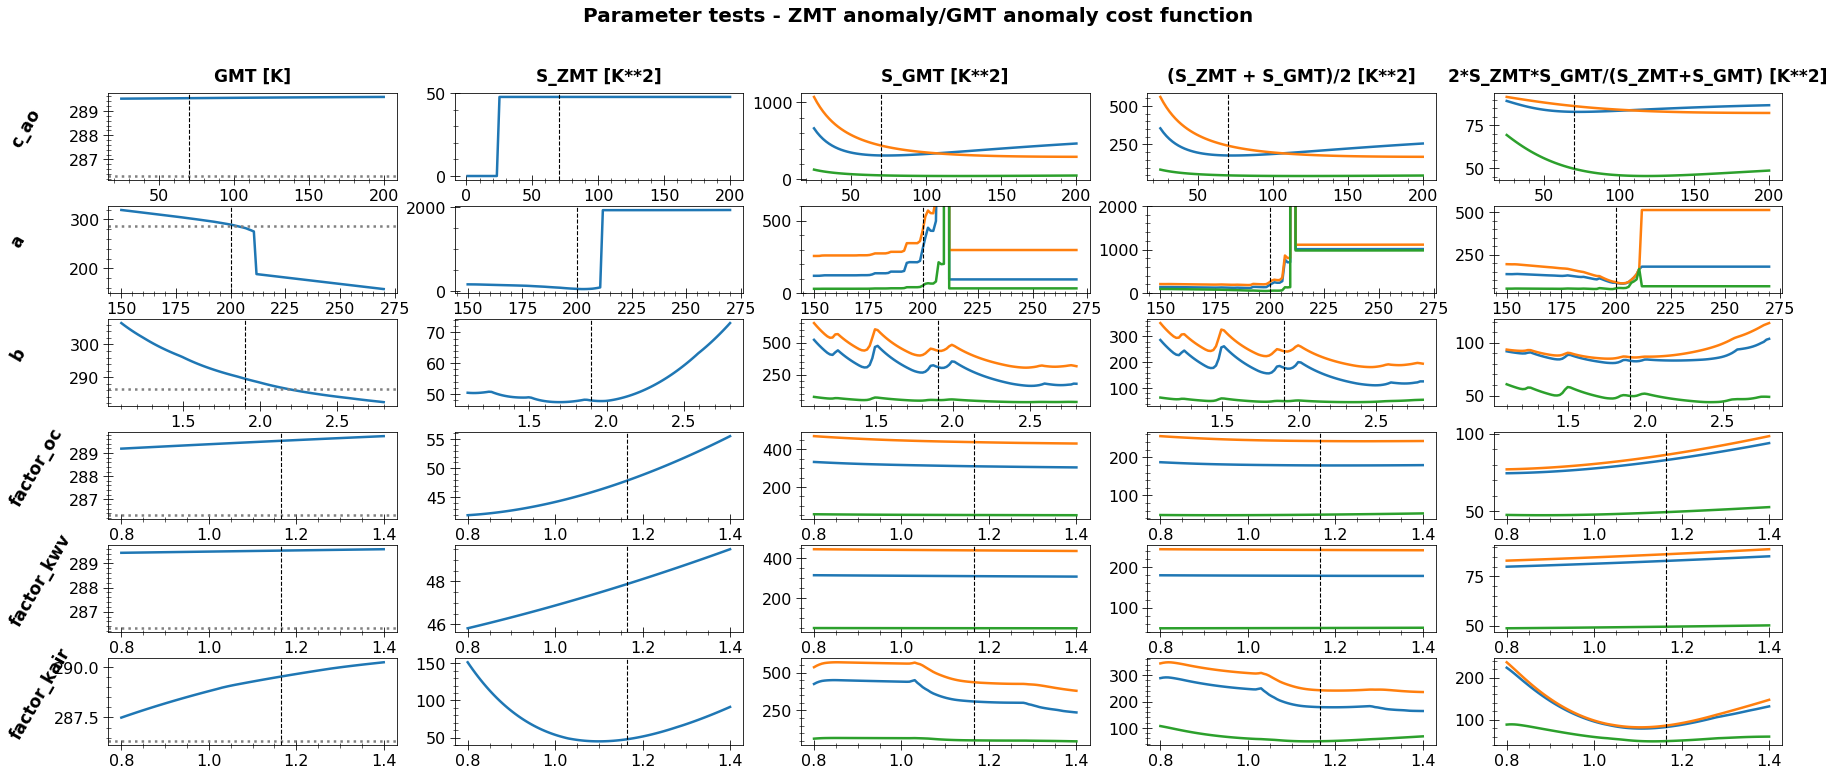

In [29]:
fig,ax=plt.subplots(6,5,figsize=(30,12))

for i in range(6):
    ax[i,0].plot(Ptest_HadCM3_paras[i],Ptest_HadCM3_GMT_0[i])
    
    ax[i,0].axhline(np.average(ZMT_ERA_raw,weights=np.cos(Lat_10*np.pi/180),axis=0),0,1,c='grey',linestyle=':')
    #ax[i,0].axvline(Ptest_HadCM3_paras[i][np.argmin(S_ZMT_HadCM3[i])],0,1,c='r',linestyle=':')
    ax[i,0].axvline(Parameters[i]['reference'],0,1,c='k',linestyle='--',linewidth=1.1)
    
for i in range(6):
    ax[i,1].plot(Ptest_HadCM3_paras[i],S_ZMT_HadCM3_anomaly[i])
    ax[i,1].axvline(Parameters[i]['reference'],0,1,c='k',linestyle='--',linewidth=1.1)

    #ax[i,1].plot(Ptest_CESM_paras[i],Ptest_CESM_GMT_0[i])

for i in range(6):   
    ax[i,2].plot(Ptest_HadCM3_paras[i],S_GMT_HadCM3[i])
    ax[i,2].plot(Ptest_CESM_paras[i],S_GMT_CESM[i])
    ax[i,2].plot(Ptest_Pages_paras[i],S_GMT_Pages[i])
    ax[i,2].axvline(Parameters[i]['reference'],0,1,c='k',linestyle='--',linewidth=1.1)
    ax[1,2].set_ylim(0,600)
    
for i in range(6):   
    ax[i,3].plot(Ptest_HadCM3_paras[i],S_sum_mean_HadCM3_anomaly[i])
    ax[i,3].plot(Ptest_CESM_paras[i],S_sum_mean_CESM_anomaly[i])
    ax[i,3].plot(Ptest_Pages_paras[i],S_sum_mean_Pages_anomaly[i])
    ax[i,3].axvline(Parameters[i]['reference'],0,1,c='k',linestyle='--',linewidth=1.1)
    ax[1,3].set_ylim(0,2000)
    
for i in range(6):   
    ax[i,4].plot(Ptest_HadCM3_paras[i],S_sum_selfweight_HadCM3_anomaly[i])
    ax[i,4].plot(Ptest_CESM_paras[i],S_sum_selfweight_CESM_anomaly[i])
    ax[i,4].plot(Ptest_Pages_paras[i],S_sum_selfweight_Pages_anomaly[i])
    ax[i,4].axvline(Parameters[i]['reference'],0,1,c='k',linestyle='--',linewidth=1.1)

    
plt.subplots_adjust(hspace=0.3,wspace=0.2)

for i in range(6):
    plt.text(-0.35, 0.6, Parameters[i]['name'][1],
    ha='left', va='center',
    transform=ax[i,0].transAxes,fontsize=17, rotation=60,weight='bold'
)
types=['GMT [K]','S_ZMT [K**2]','S_GMT [K**2]','(S_ZMT + S_GMT)/2 [K**2]','2*S_ZMT*S_GMT/(S_ZMT+S_GMT) [K**2]']
for i in range(5):
    plt.text(0.5, 1.3, types[i],
    ha='center', va='top',
    transform=ax[0,i].transAxes,fontsize=17 ,weight='bold'
)
fig.suptitle('Parameter tests - ZMT anomaly/GMT anomaly cost function',fontsize=20,weight='bold')
#ax[1,2].set_ylim(0,1000)
    #ax[i,2].plot(Ptest_Pages_paras[i],Ptest_Pages_GMT_0[i])
#gs = gridspec.GridSpec(3, 3, width_ratios=[1, 2]) 
#ax=np.array([[plt.subplot(gs[0,0]),plt.subplot(gs[0,1])],
#             [plt.subplot(gs[1,0]),plt.subplot(gs[1,1])],
#             [plt.subplot(gs[2,0]),plt.subplot(gs[2,1])]])
#plt.savefig('Experiments/Parametertest_anomaly.png',dpi=400,bbox_inches='tight')

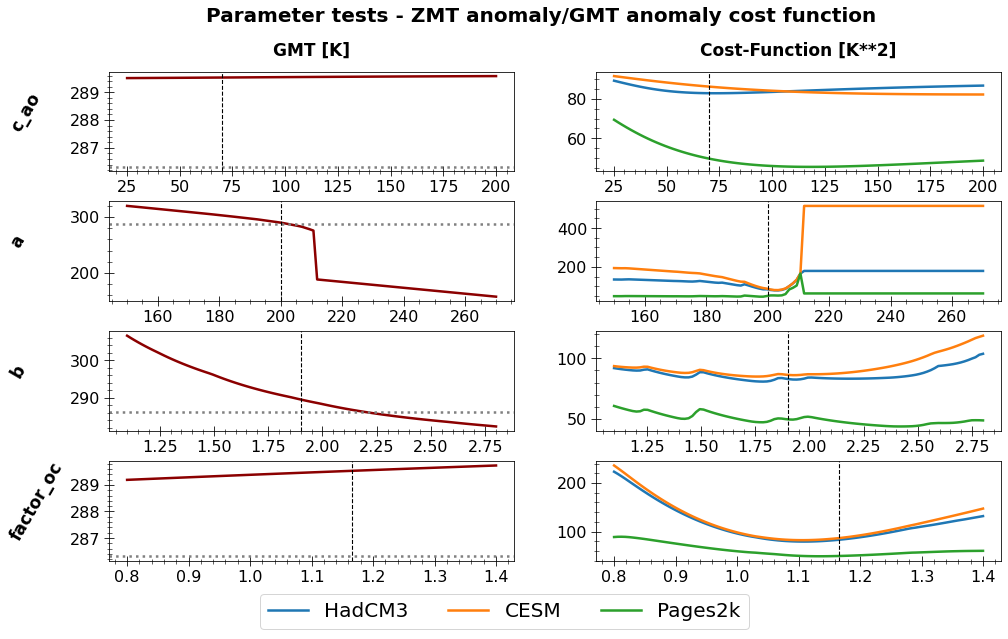

In [51]:
fig,ax=plt.subplots(4,2,figsize=(16,9))

for i in [0,1,2,3]:
    ax[i,0].plot(Ptest_HadCM3_paras[i],Ptest_HadCM3_GMT_0[i],c='darkred')
    
    ax[i,0].axhline(np.average(ZMT_ERA_raw,weights=np.cos(Lat_10*np.pi/180),axis=0),0,1,c='grey',linestyle=':')
    #ax[i,0].axvline(Ptest_HadCM3_paras[i][np.argmin(S_ZMT_HadCM3[i])],0,1,c='r',linestyle=':')
    ax[i,0].axvline(Parameters[i]['reference'],0,1,c='k',linestyle='--',linewidth=1.1)
    #ax[i,1].plot(Ptest_CESM_paras[i],Ptest_CESM_GMT_0[i])

models=['HadCM3','CESM','Pages2k']
for i in [0,1,2]:   
    k=i
    ax[i,1].plot(Ptest_HadCM3_paras[k],S_sum_selfweight_HadCM3_anomaly[k])
    ax[i,1].plot(Ptest_CESM_paras[k],S_sum_selfweight_CESM_anomaly[k])
    ax[i,1].plot(Ptest_Pages_paras[k],S_sum_selfweight_Pages_anomaly[k])
    ax[i,1].axvline(Parameters[k]['reference'],0,1,c='k',linestyle='--',linewidth=1.1)


k=5
i=3
ax[i,1].plot(Ptest_HadCM3_paras[k],S_sum_selfweight_HadCM3_anomaly[k],label=models[0])
ax[i,1].plot(Ptest_CESM_paras[k],S_sum_selfweight_CESM_anomaly[k],label=models[1])
ax[i,1].plot(Ptest_Pages_paras[k],S_sum_selfweight_Pages_anomaly[k],label=models[2])
ax[i,1].axvline(Parameters[k]['reference'],0,1,c='k',linestyle='--',linewidth=1.1)
    
plt.subplots_adjust(hspace=0.3,wspace=0.2)

for i in range(4):
    plt.text(-0.25, 0.6, Parameters[i]['name'][1],
    ha='left', va='center',
    transform=ax[i,0].transAxes,fontsize=17, rotation=60,weight='bold'
)
types=['GMT [K]','Cost-Function [K**2]']
for i in range(2):
    plt.text(0.5, 1.3, types[i],
    ha='center', va='top',
    transform=ax[0,i].transAxes,fontsize=17 ,weight='bold'
)
fig.suptitle('Parameter tests - ZMT anomaly/GMT anomaly cost function',fontsize=20,weight='bold')
fig.legend(ncol=3,fontsize=20,loc='lower center')
#ax[1,2].set_ylim(0,1000)
    #ax[i,2].plot(Ptest_Pages_paras[i],Ptest_Pages_GMT_0[i])
#gs = gridspec.GridSpec(3, 3, width_ratios=[1, 2]) 
#ax=np.array([[plt.subplot(gs[0,0]),plt.subplot(gs[0,1])],
#             [plt.subplot(gs[1,0]),plt.subplot(gs[1,1])],
#             [plt.subplot(gs[2,0]),plt.subplot(gs[2,1])]])
plt.savefig('Experiments/Parametertest_showcase.png',dpi=400,bbox_inches='tight',transparent=True)

Text(0.5, 0.98, 'Parameter tests - ZMT / GMT anomaly cost function')

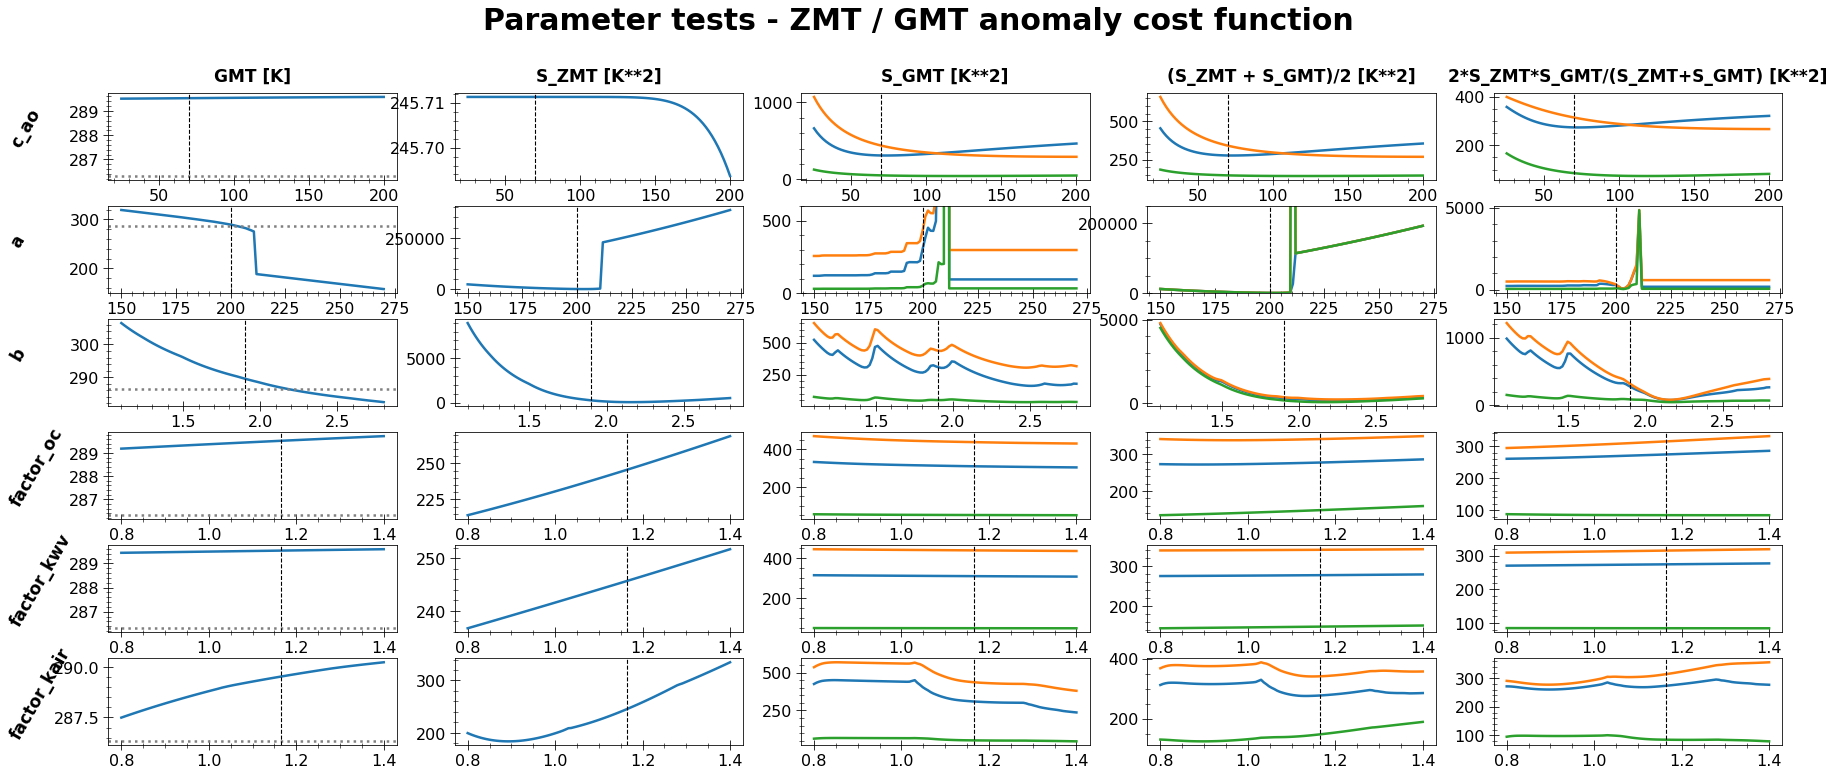

In [30]:
fig,ax=plt.subplots(6,5,figsize=(30,12))

for i in range(6):
    ax[i,0].plot(Ptest_HadCM3_paras[i],Ptest_HadCM3_GMT_0[i])
    
    ax[i,0].axhline(np.average(ZMT_ERA_raw,weights=np.cos(Lat_10*np.pi/180),axis=0),0,1,c='grey',linestyle=':')
    #ax[i,0].axvline(Ptest_HadCM3_paras[i][np.argmin(S_ZMT_HadCM3[i])],0,1,c='r',linestyle=':')
    ax[i,0].axvline(Parameters[i]['reference'],0,1,c='k',linestyle='--',linewidth=1.1)
    
for i in range(6):
    ax[i,1].plot(Ptest_HadCM3_paras[i],S_ZMT_HadCM3[i])
    ax[i,1].axvline(Parameters[i]['reference'],0,1,c='k',linestyle='--',linewidth=1.1)

    #ax[i,1].plot(Ptest_CESM_paras[i],Ptest_CESM_GMT_0[i])

for i in range(6):   
    ax[i,2].plot(Ptest_HadCM3_paras[i],S_GMT_HadCM3[i])
    ax[i,2].plot(Ptest_CESM_paras[i],S_GMT_CESM[i])
    ax[i,2].plot(Ptest_Pages_paras[i],S_GMT_Pages[i])
    ax[i,2].axvline(Parameters[i]['reference'],0,1,c='k',linestyle='--',linewidth=1.1)
    ax[1,2].set_ylim(0,600)
    
for i in range(6):   
    ax[i,3].plot(Ptest_HadCM3_paras[i],S_sum_mean_HadCM3[i])
    ax[i,3].plot(Ptest_CESM_paras[i],S_sum_mean_CESM[i])
    ax[i,3].plot(Ptest_Pages_paras[i],S_sum_mean_Pages[i])
    ax[i,3].axvline(Parameters[i]['reference'],0,1,c='k',linestyle='--',linewidth=1.1)
    ax[1,3].set_ylim(0,250000)
for i in range(6):   
    ax[i,4].plot(Ptest_HadCM3_paras[i],S_sum_selfweight_HadCM3[i])
    ax[i,4].plot(Ptest_CESM_paras[i],S_sum_selfweight_CESM[i])
    ax[i,4].plot(Ptest_Pages_paras[i],S_sum_selfweight_Pages[i])
    ax[i,4].axvline(Parameters[i]['reference'],0,1,c='k',linestyle='--',linewidth=1.1)

    
plt.subplots_adjust(hspace=0.3,wspace=0.2)

for i in range(6):
    plt.text(-0.35, 0.6, Parameters[i]['name'][1],
    ha='left', va='center',
    transform=ax[i,0].transAxes,fontsize=17, rotation=60,weight='bold'
)
types=['GMT [K]','S_ZMT [K**2]','S_GMT [K**2]','(S_ZMT + S_GMT)/2 [K**2]','2*S_ZMT*S_GMT/(S_ZMT+S_GMT) [K**2]']
for i in range(5):
    plt.text(0.5, 1.3, types[i],
    ha='center', va='top',
    transform=ax[0,i].transAxes,fontsize=17 ,weight='bold'
)
fig.suptitle('Parameter tests - ZMT / GMT anomaly cost function',fontsize=30,weight='bold')
#ax[1,2].set_ylim(0,1000)
    #ax[i,2].plot(Ptest_Pages_paras[i],Ptest_Pages_GMT_0[i])
#gs = gridspec.GridSpec(3, 3, width_ratios=[1, 2]) 
#ax=np.array([[plt.subplot(gs[0,0]),plt.subplot(gs[0,1])],
#             [plt.subplot(gs[1,0]),plt.subplot(gs[1,1])],
#             [plt.subplot(gs[2,0]),plt.subplot(gs[2,1])]])
#plt.savefig('Experiments/Parametertest.png',dpi=400,bbox_inches='tight')

# HadCM3 Optimizations

In [63]:
import pandas as pd

df1 = pd.read_csv('../Data/Optimizations_HadCM3/xnagd_20abs.csv',converters=dict(zip(np.arange(1,8),[lambda d: np.array(eval(d))]*7)))

In [93]:
HadCM3_GMT_anomaly=pd.read_csv('Experiments/HadCM3/HadCM3_850_anomaly.csv')
HadCM3_GMT=pd.read_csv('Experiments/HadCM3/HadCM3_850.csv')


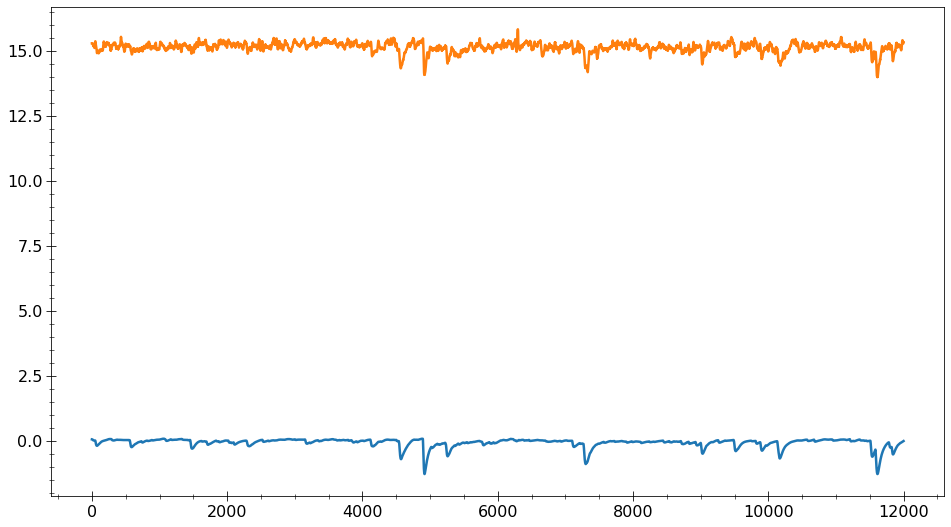

In [95]:
plt.plot(np.vstack(df1['GMT'])[0])
plt.plot(HadCM3_GMT_anomaly['xnagd'])

In [59]:
plt.plot(df1['F'].value[:,0])

AttributeError: 'Series' object has no attribute 'value'